In [1]:
import os
import imageio
import OpenEXR
import Imath
import numpy as np
import matplotlib.pyplot as plt

In [2]:
baseDir = 'I:/dataset/HDR Video dataset/'
# dataDir = 'LIU_HDRv/'
# dataDir = 'dataset_select/train/' 
dataDir = 'F:/HDR_video/original-hdr/'

In [3]:
def makeDir(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
       
def muLaw(img, mu = 5000):
    hdr = (np.log(1 + mu * img)) / (np.log(1 + mu))
    return hdr

def EXR2HDR(imDir, hdrDir):
    File = OpenEXR.InputFile(baseDir+dataDir+Scene+'/'+Frame)
    PixType = Imath.PixelType(Imath.PixelType.FLOAT)
    DW = File.header()['dataWindow']
    Size = (DW.max.x - DW.min.x + 1, DW.max.y - DW.min.y + 1)
    rgb = [np.fromstring(File.channel(c, PixType), dtype=np.float32) for c in 'RGB']
    rgbResize =[np.reshape(x,(Size[1],Size[0],1)) for x in rgb]
    hdr = np.concatenate((rgbResize[0],rgbResize[1],rgbResize[2]),2) # H,W,C
    imageio.imwrite(hdrDir,hdr,format='hdr')
    return hdr

def HDR2LDR(hdr):
    target_type_max = 255
    darkest = np.min(hdr)
    lighest = np.max(hdr)
    print('max/min: %f / %f' %(lighest,darkest))
    r = target_type_max/(lighest-darkest)
    b = target_type_max - a * imax
    ldr = (a * img + b).astype(np.uint8)
#     ldr = (ldr*255).astype(np.uint8)
    return ldr

def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

def sRGBDeLinearize(linearsRGB):
    linearsRGB = np.where(linearsRGB<=0.0031308, linearsRGB*12.92, 1.055*(linearsRGB**(1.0/2.4))-0.055)
    return linearsRGB

In [166]:
SceneList = os.listdir(dataDir)
# SceneList = os.listdir(baseDir+dataDir)
for Scene in SceneList[31:32]:
    print(Scene)
    FrameList = os.listdir(dataDir+Scene)
    for Frame in FrameList[111:112]:
        print(Frame)
        if(Frame[-4:]=='.hdr'):
            hdr = imageio.imread(baseDir+dataDir+Scene+'/'+Frame)
        else:
            File = OpenEXR.InputFile(dataDir+Scene+'/'+Frame)
            PixType = Imath.PixelType(Imath.PixelType.FLOAT)
            DW = File.header()['dataWindow']
            Size = (DW.max.x - DW.min.x + 1, DW.max.y - DW.min.y + 1)
            rgb = [np.frombuffer(File.channel(c, PixType), dtype=np.float32) for c in 'RGB']
            rgbResize =[np.reshape(x,(Size[1],Size[0],1)) for x in rgb]
            hdr = np.concatenate((rgbResize[0],rgbResize[1],rgbResize[2]),2) # H,W,C

smith_welding
smith_welding_000524.exr


In [167]:
target_type_max = 255
Exposure = 0
AlexaWideGamut2sRGB = np.array([[1.617523436306807, -0.070572740897816, -0.021101728042793], \
                                  [-0.537286622188294, 1.334613062330328, -0.226953875218266], \
                                  [-0.080236814118512, -0.264040321432512, 1.248055603261060]]);
maxVlinear = np.max(hdr)
minVlinear = np.min(hdr)
print('max/min: %f / %f'%(maxVlinear,minVlinear))
# hdr_norm = (hdr-minVlinear)/(maxVlinear-minVlinear)
# print('max/min: %f / %f'%(np.max(hdr_norm),np.min(hdr_norm)))
### 色域转换
# linearsRGBImg = np.dot(np.reshape(hdr*(2**Exposure),[-1,3]), AlexaWideGamut2sRGB)
# linearsRGBImg = np.reshape(linearsRGBImg,(Size[1],Size[0],3))
# print('min linearsRGBImg: %f'%(np.min(linearsRGBImg)))
# linearsRGBImg[linearsRGBImg<0] = 0

# gammaRGBImg = np.clip(hdr*(2**Exposure),0,255)/255.0
gammaRGBImg = np.clip(hdr*(2**Exposure),0,1)
# linearsRGBImg = hdr*(2**Exposure)
# linearsRGBImg = linearsRGBImg-np.min(linearsRGBImg)
# ldr = sRGBDeLinearize(linearsRGBImg)

max/min: 539.500000 / -0.013817


max/min: 1.000000 / 0.000000


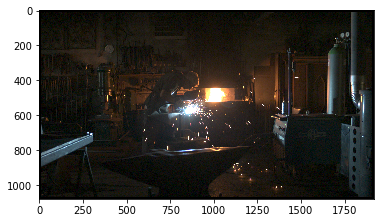

In [168]:
gammaRGBImg = gammaRGBImg**(1/2.2)
plt.imshow((gammaRGBImg*255).astype(np.uint8))
# plt.show()
# ldr = (ldr**(1/2.4)*255).astype(np.uint8)
print('max/min: %f / %f'%(np.max(gammaRGBImg), np.min(gammaRGBImg)))
# plt.imshow(np.clip(ldr,0,255).astype(np.uint8))
# plt.imshow(np.clip(ldr,0,1))
# plt.imshow((ldr*255).astype(np.uint8))
# plt.imshow((muLaw(ldr/255, 1000)*255).astype(np.uint8))
plt.show()

In [137]:
np.min(linearsRGBImg)
# hdr.dtype

0.0

In [145]:
maxVlinear

761.6095976095207